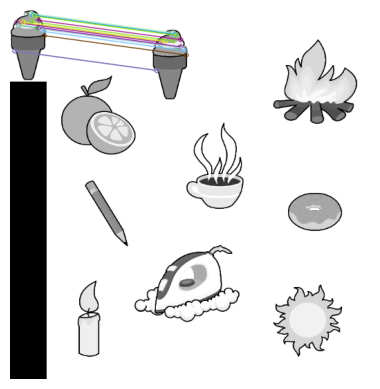

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load query and target images in grayscale
query_img = cv2.imread('Query.png', cv2.IMREAD_GRAYSCALE)
target_img = cv2.imread('Target.png', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector (use ORB if preferred)
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(query_img, None)
kp2, des2 = sift.detectAndCompute(target_img, None)

# Match descriptors using BFMatcher and apply ratio test
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw good matches
matched_img = cv2.drawMatches(query_img, kp1, target_img, kp2, good_matches, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Save the image
cv2.imwrite('Output.png', matched_img)

# Display result
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
